In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('US_Accidents_March23_sampled_500k.csv')

In [8]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [9]:
data.shape

(500000, 46)

In [10]:
data.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [12]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
data["Weather_Timestamp"].value_counts()

Weather_Timestamp
2022-03-13 01:53:00    92
2021-01-26 15:53:00    48
2021-12-03 16:53:00    40
2022-04-13 16:53:00    40
2021-01-15 22:53:00    39
                       ..
2022-03-12 11:26:00     1
2020-09-18 11:51:00     1
2019-12-05 20:55:00     1
2017-10-12 07:49:00     1
2020-05-15 17:15:00     1
Name: count, Length: 255623, dtype: int64

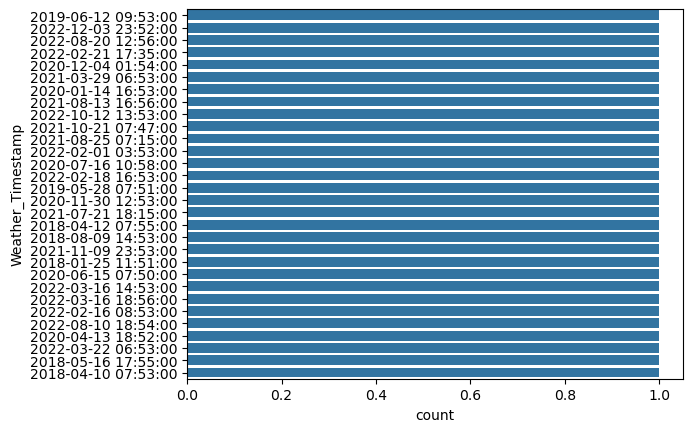

In [14]:
sns.countplot(y="Weather_Timestamp",data=data[: 30])
plt.show()

In [15]:
data["City"].value_counts()

City
Miami            12141
Houston          11031
Los Angeles      10299
Charlotte         8979
Dallas            8245
                 ...  
Newcomerstown        1
Lakehurst            1
New Concord          1
Smithmill            1
Fair Haven           1
Name: count, Length: 9488, dtype: int64

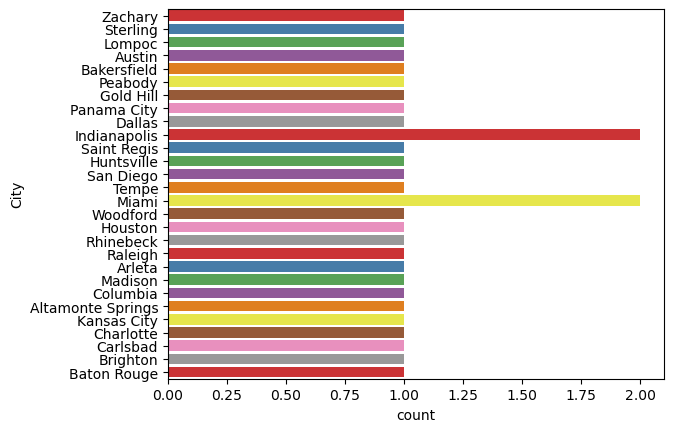

In [52]:
sns.countplot(y="City",data=data[: 30],palette="Set1")
plt.show()

In [18]:
data.Start_Time=pd.to_datetime(data.Start_Time,format='mixed')
data.Start_Time

0        2019-06-12 10:10:56
1        2022-12-03 23:37:14
2        2022-08-20 13:13:00
3        2022-02-21 17:43:04
4        2020-12-04 01:46:00
                 ...        
499995   2021-12-15 07:30:00
499996   2021-12-19 16:25:00
499997   2022-04-13 19:28:29
499998   2020-05-15 17:20:56
499999   2022-04-02 23:23:13
Name: Start_Time, Length: 500000, dtype: datetime64[ns]

In [19]:
data['start_day']=data.Start_Time.dt.day
data['start_day']

0         12
1          3
2         20
3         21
4          4
          ..
499995    15
499996    19
499997    13
499998    15
499999     2
Name: start_day, Length: 500000, dtype: int32

In [20]:
data['start_hr']=data.Start_Time.dt.time
data.start_hr

0         10:10:56
1         23:37:14
2         13:13:00
3         17:43:04
4         01:46:00
            ...   
499995    07:30:00
499996    16:25:00
499997    19:28:29
499998    17:20:56
499999    23:23:13
Name: start_hr, Length: 500000, dtype: object

In [21]:
time_of_accident=data.start_hr.value_counts()
time_of_accident

start_hr
17:17:00    159
15:41:00    157
15:06:00    156
14:17:00    154
14:45:00    154
           ... 
21:56:05      1
02:04:18      1
13:01:21      1
02:49:29      1
05:00:12      1
Name: count, Length: 77211, dtype: int64

In [22]:
time_of_accident_high=time_of_accident[time_of_accident>=1000]
time_of_accident_low=time_of_accident[time_of_accident<1000]

print(time_of_accident_high,'\n',time_of_accident_low)

Series([], Name: count, dtype: int64) 
 start_hr
17:17:00    159
15:41:00    157
15:06:00    156
14:17:00    154
14:45:00    154
           ... 
21:56:05      1
02:04:18      1
13:01:21      1
02:49:29      1
05:00:12      1
Name: count, Length: 77211, dtype: int64


In [26]:
data.start_day.value_counts()

start_day
23    18159
22    17928
12    17354
15    17181
14    17147
18    17058
20    17057
16    17024
21    17018
19    17015
11    16995
13    16923
17    16818
8     16497
6     16138
10    16122
24    16046
9     16011
5     15976
7     15972
1     15885
2     15860
27    15818
3     15805
4     15651
28    15551
26    15355
30    15073
25    15018
29    14481
31     9064
Name: count, dtype: int64

In [28]:
data['start_date']=data.Start_Time.dt.date

In [29]:
data['start_date']


0         2019-06-12
1         2022-12-03
2         2022-08-20
3         2022-02-21
4         2020-12-04
             ...    
499995    2021-12-15
499996    2021-12-19
499997    2022-04-13
499998    2020-05-15
499999    2022-04-02
Name: start_date, Length: 500000, dtype: object

In [31]:
data.start_date.value_counts()

start_date
2021-02-12    613
2022-12-15    596
2022-12-22    592
2021-02-11    590
2022-12-23    590
             ... 
2021-08-09      1
2016-04-23      1
2022-05-09      1
2016-02-12      1
2022-05-06      1
Name: count, Length: 2537, dtype: int64

In [32]:
data.Start_Time.dt.month.value_counts()

Start_Time
12    54589
11    49020
1     48553
10    43839
2     42962
9     42255
8     38670
4     38378
6     36660
5     36154
3     35557
7     33363
Name: count, dtype: int64

In [33]:
data["Severity"].value_counts()

Severity
2    398142
3     84520
4     13064
1      4274
Name: count, dtype: int64

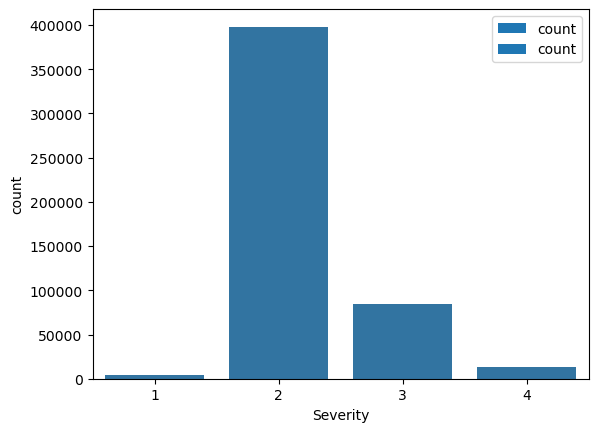

In [34]:
sns.countplot(x="Severity",data=data)
plt.show()

In [35]:
data.drop(columns="ID",axis=1,inplace=True)

In [36]:
data["Source"].value_counts()

Source
Source1    279623
Source2    214044
Source3      6333
Name: count, dtype: int64

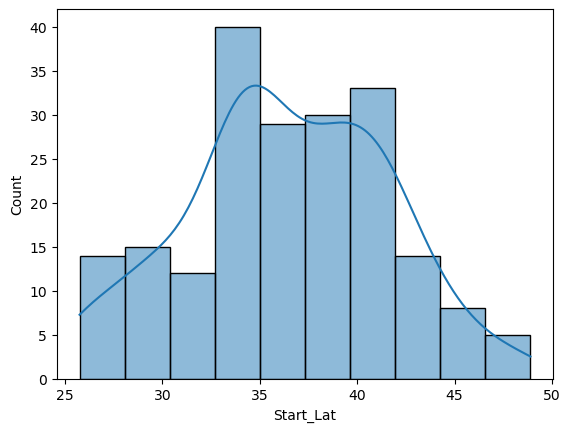

In [37]:
sns.histplot(data=data["Start_Lat"][: 200], kde=True)
plt.show()

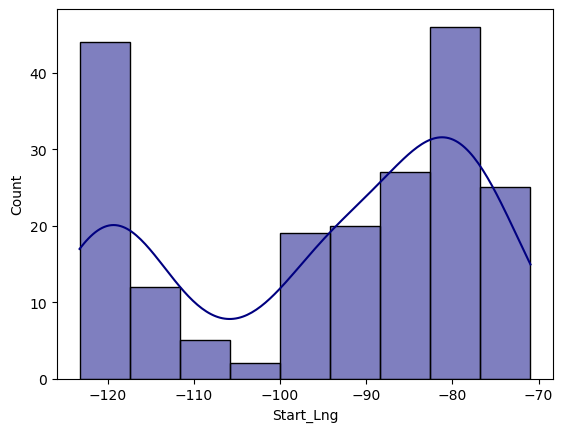

In [39]:
sns.histplot(data=data["Start_Lng"][: 200], kde=True,color="navy")
plt.show()

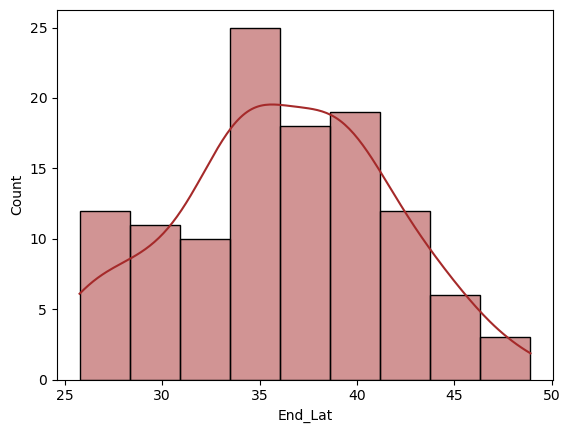

In [40]:
sns.histplot(data=data["End_Lat"][: 200], kde=True,color="brown")
plt.show()

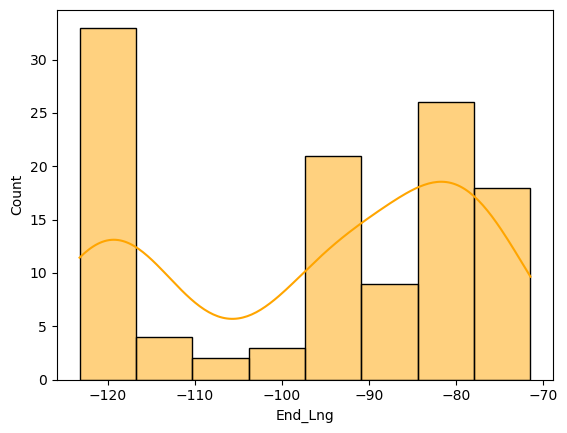

In [41]:
sns.histplot(data=data["End_Lng"][: 200], kde=True,color="orange")
plt.show()

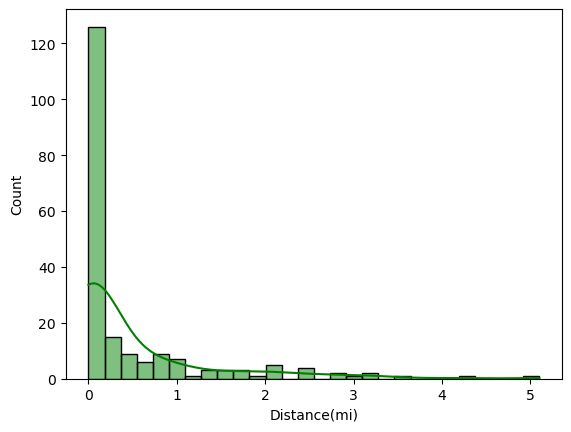

In [42]:
sns.histplot(data=data["Distance(mi)"][: 200], kde=True,color="green")
plt.show()

In [43]:
data["State"].value_counts()

State
CA    113274
FL     56710
TX     37355
SC     24737
NY     22594
NC     21750
VA     19515
PA     19351
MN     12333
OR     11559
AZ     11150
GA     11079
IL     10904
TN     10850
MI     10518
LA      9651
MD      9128
NJ      9020
OH      7678
WA      7004
AL      6585
UT      6310
CO      5924
OK      5296
MO      5025
CT      4602
IN      4320
MA      3917
WI      2290
KY      2101
NE      1893
MT      1871
IA      1724
AR      1483
KS      1362
NV      1343
DC      1207
RI      1093
MS       977
DE       907
WV       851
ID       718
NM       636
NH       635
WY       254
ND       238
ME       202
VT        57
SD        19
Name: count, dtype: int64

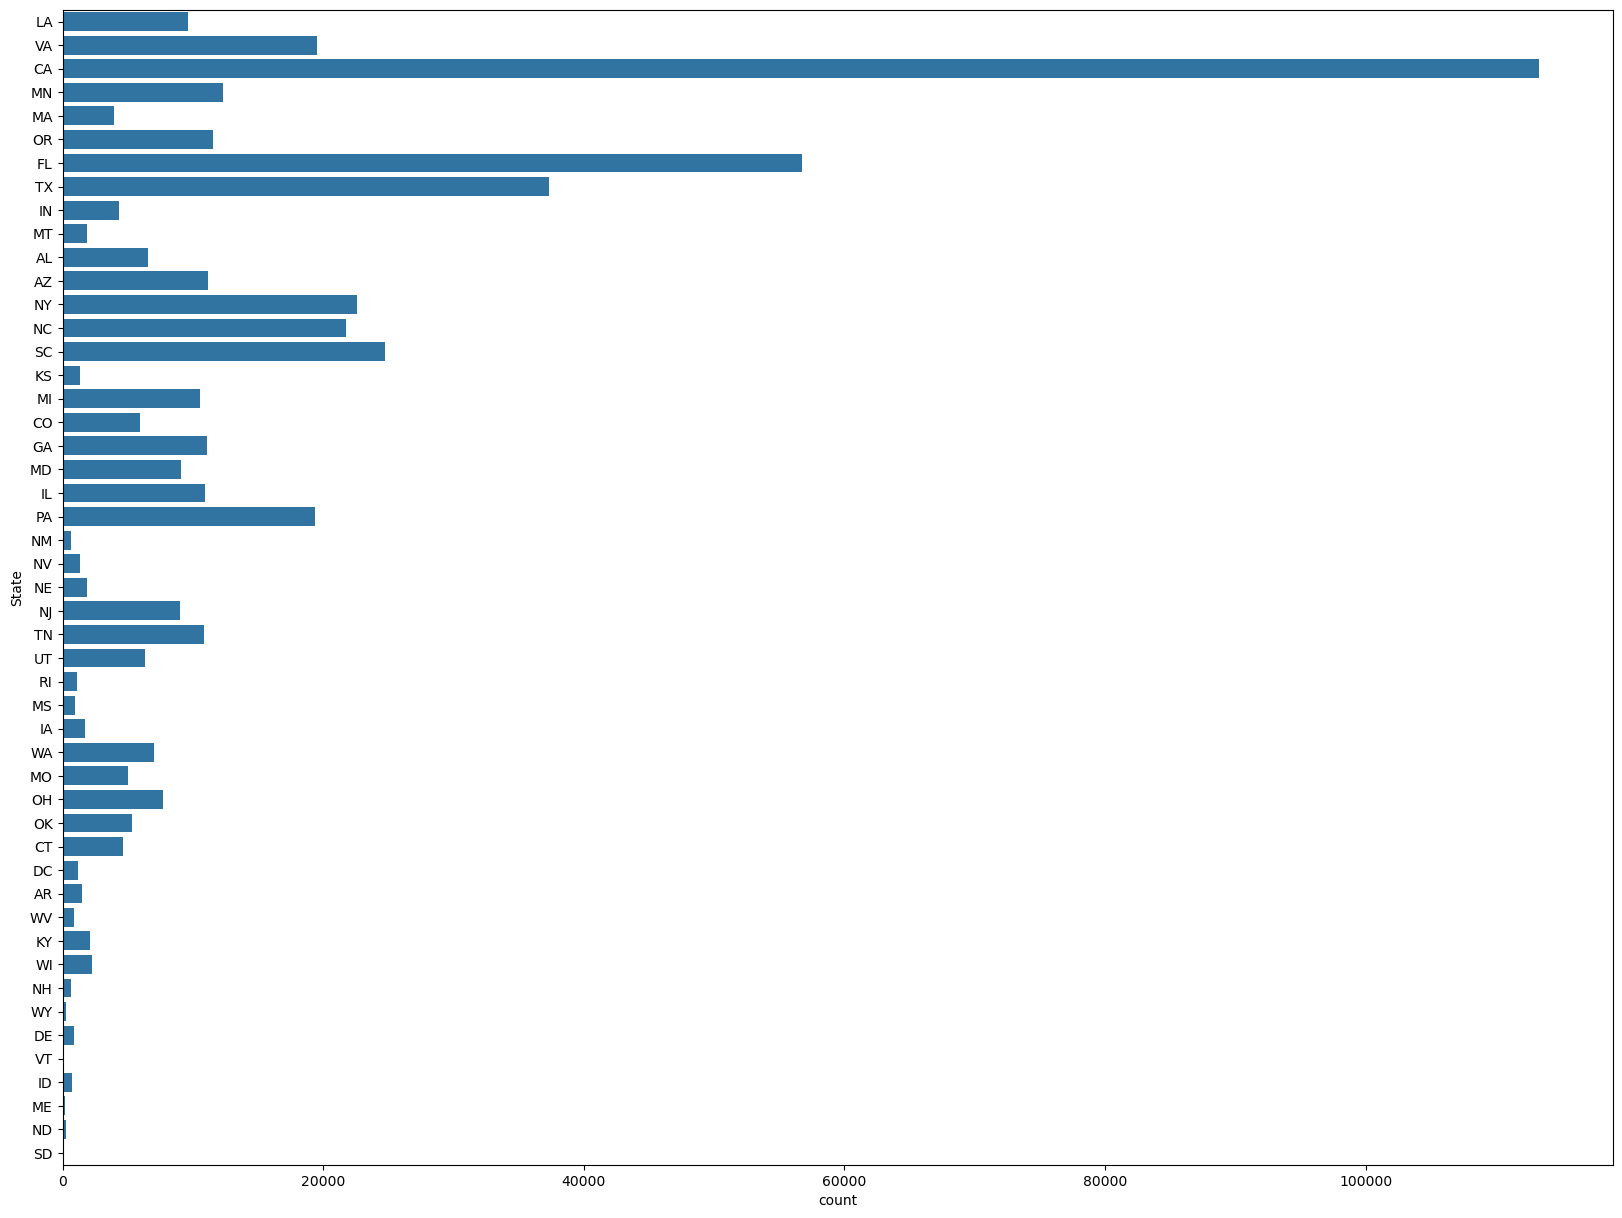

In [44]:
plt.figure(figsize=(20,15))
sns.countplot(y="State",data=data)
plt.show()

In [45]:
data["Weather_Condition"].value_counts()

Weather_Condition
Fair             166053
Mostly Cloudy     65398
Cloudy            53107
Clear             52379
Partly Cloudy     45125
                  ...  
Rain Shower           1
Light Hail            1
Light Haze            1
Sleet / Windy         1
Sand                  1
Name: count, Length: 108, dtype: int64

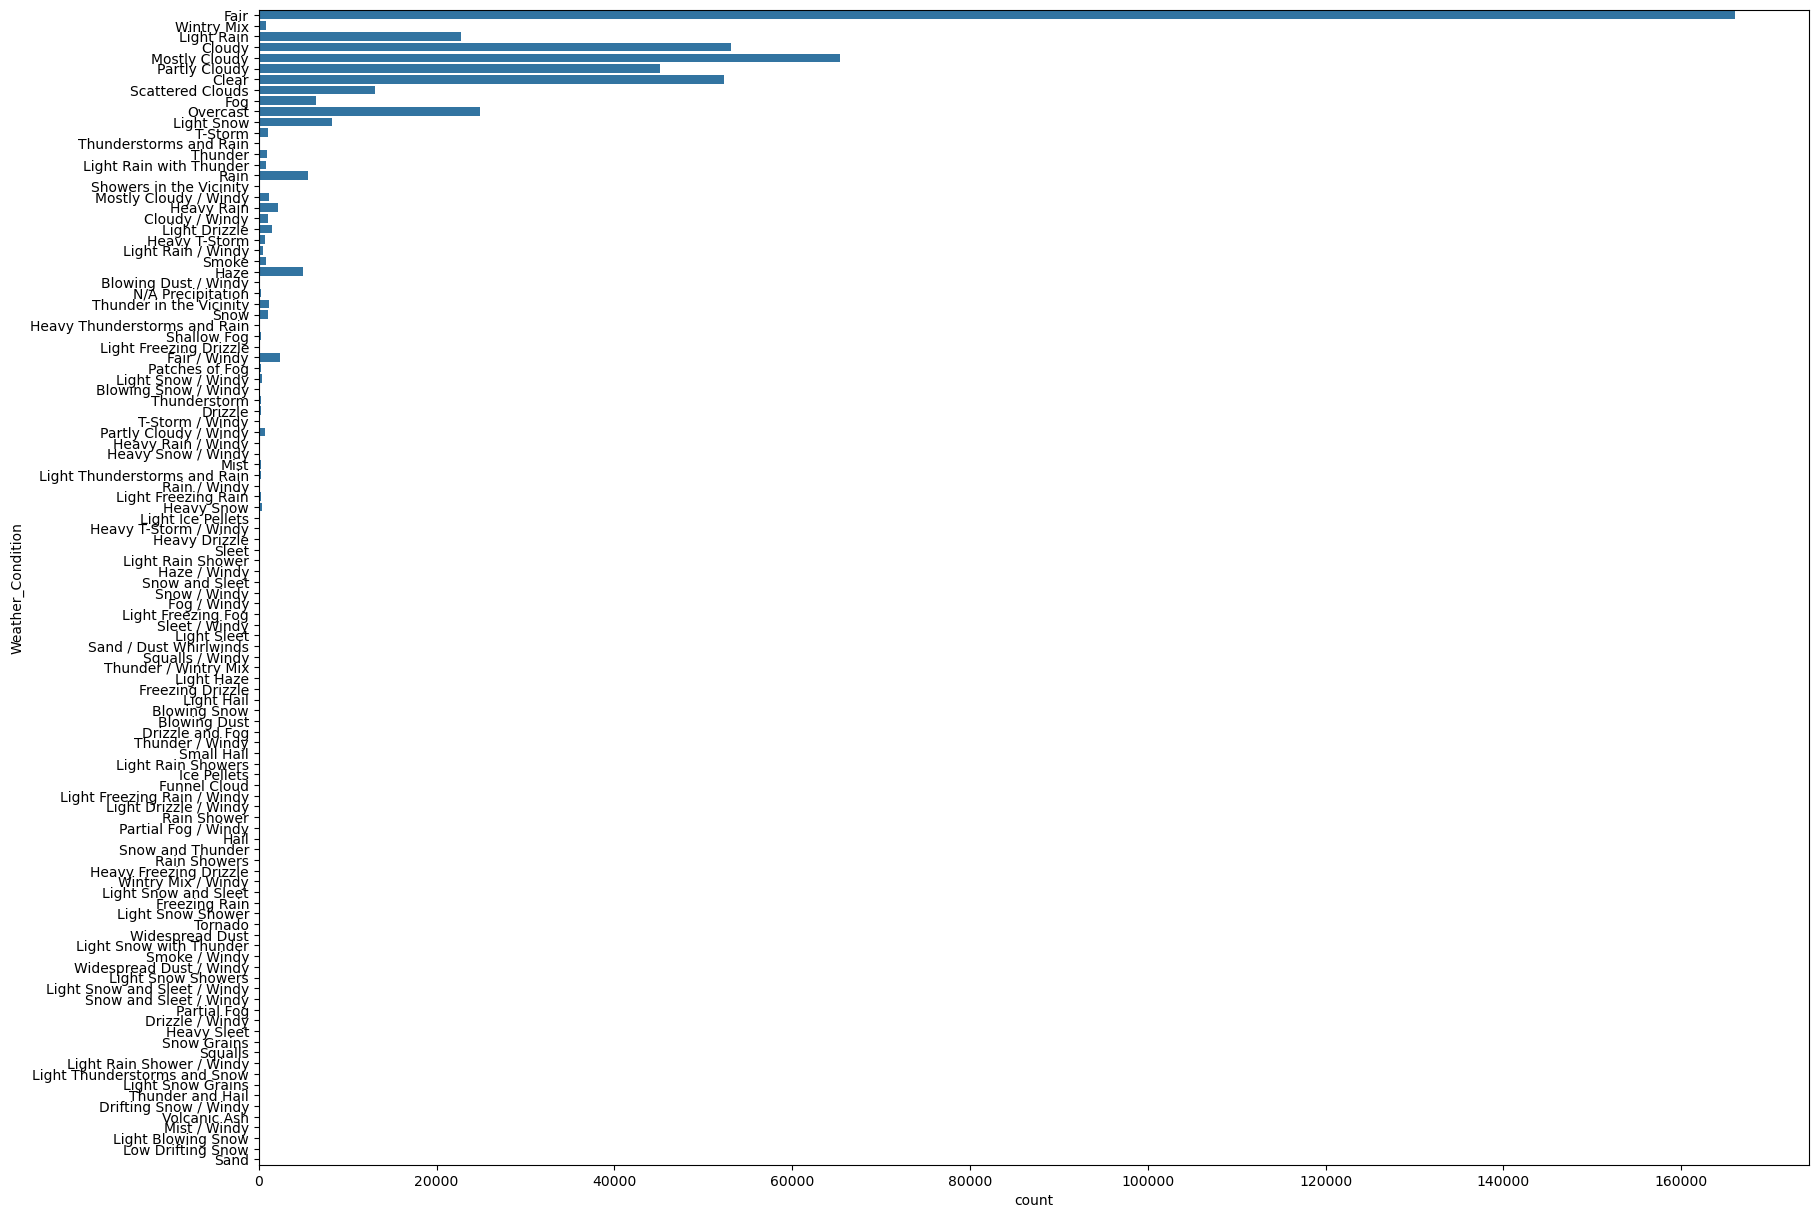

In [46]:
plt.figure(figsize=(20,15))
sns.countplot(y="Weather_Condition",data=data)
plt.show()

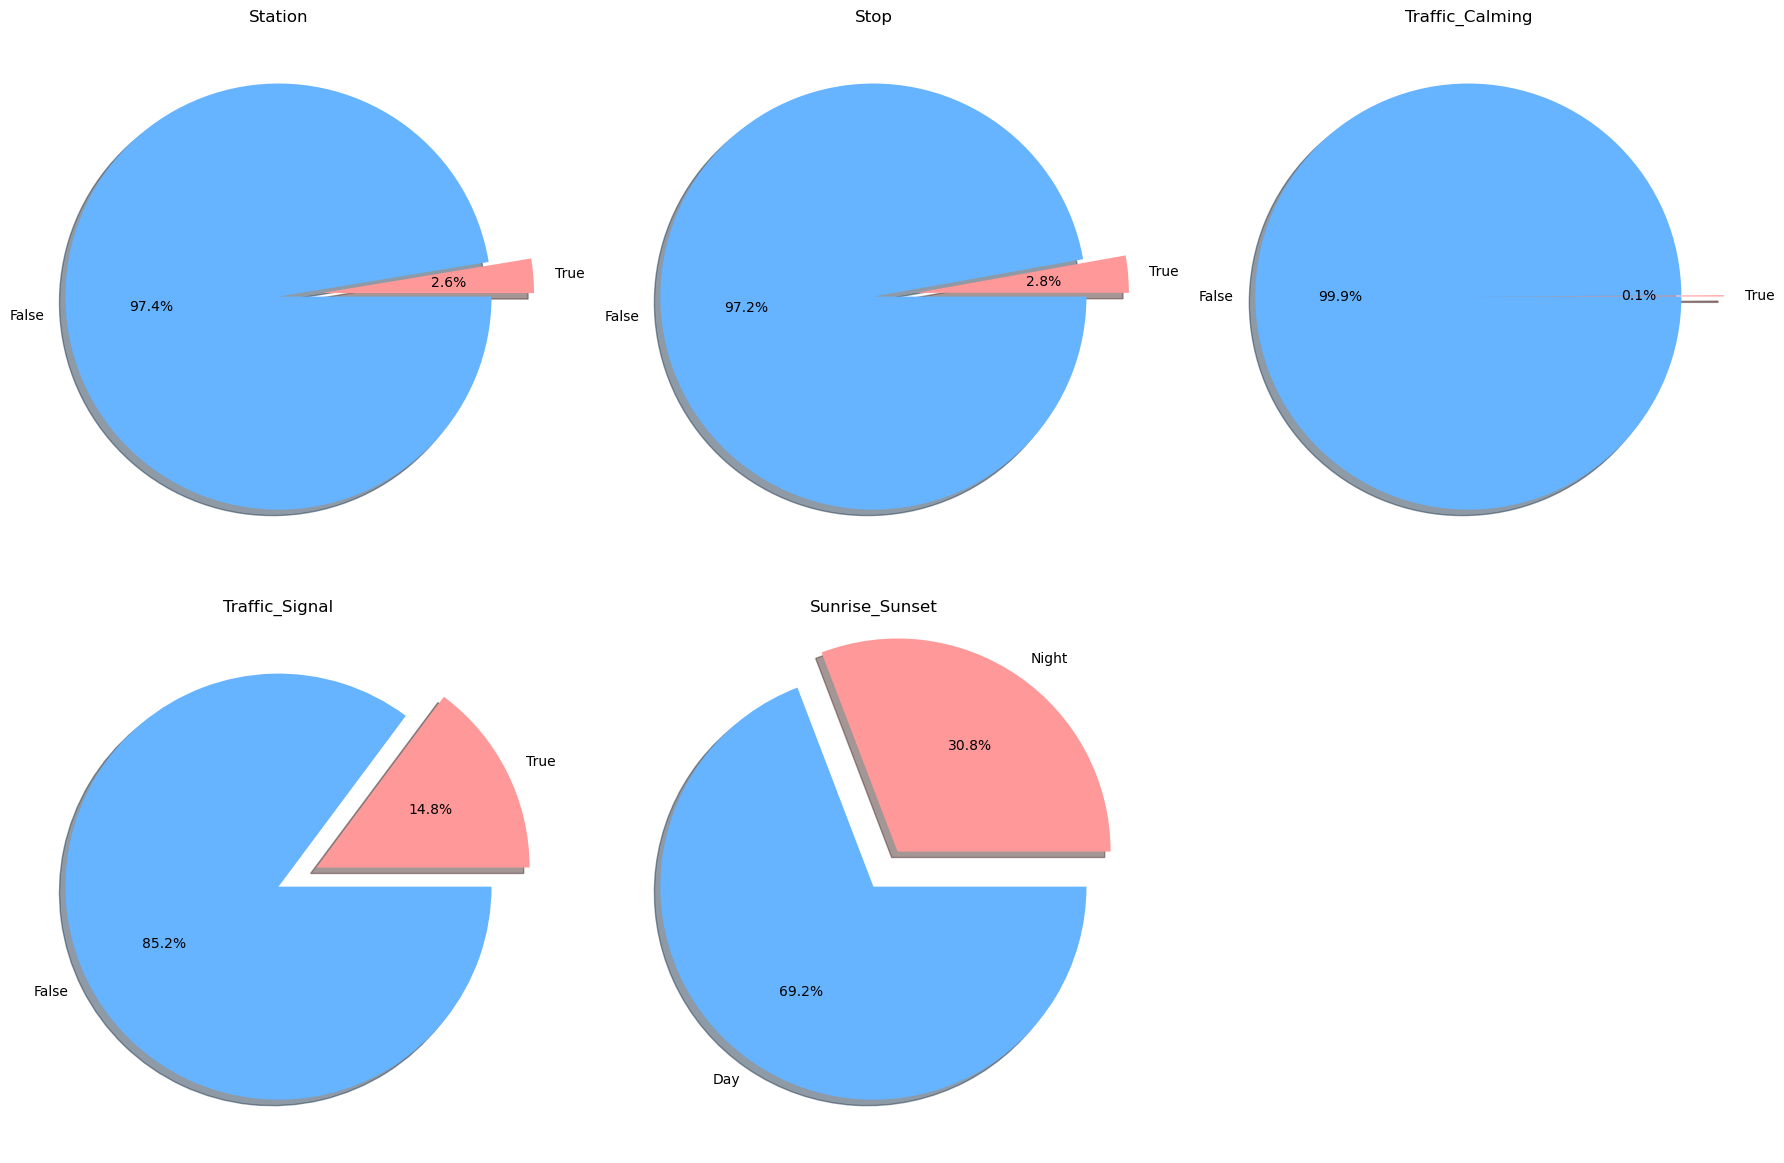

In [50]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(18, 12))
colors = ['#ff9999', '#66b3ff']
explode = (0.2, 0,)  

val1 = len(data[data['Station'] == True])
val2 = len(data[data['Station'] == False])
ax1.set_title('Station')
ax1.pie([val1, val2], labels=[True, False], autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)

val1 = len(data[data['Stop'] == True])
val2 = len(data[data['Stop'] == False])
ax2.set_title('Stop')
ax2.pie([val1, val2], labels=[True, False], autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)

val1 = len(data[data['Traffic_Calming'] == True])
val2 = len(data[data['Traffic_Calming'] == False])
ax3.set_title('Traffic_Calming')
ax3.pie([val1, val2], labels=[True, False], autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)
val1 = len(data[data['Traffic_Signal'] == True])
val2 = len(data[data['Traffic_Signal'] == False])
ax4.set_title('Traffic_Signal')
ax4.pie([val1, val2], labels=[True, False], autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)

val1 = len(data[data['Sunrise_Sunset'] == 'Night'])
val2 = len(data[data['Sunrise_Sunset'] == 'Day'])
ax5.set_title('Sunrise_Sunset')
ax5.pie([val1, val2], labels=['Night', 'Day'], autopct='%1.1f%%', explode=explode, shadow=True, colors=colors);
fig.delaxes(_)
plt.tight_layout()
plt.show()